<a href="https://colab.research.google.com/github/KzBrain/project/blob/main/lesson3_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

# data (as pandas dataframes)
X = regensburg_pediatric_appendicitis.data.features
y = regensburg_pediatric_appendicitis.data.targets

# metadata
print(regensburg_pediatric_appendicitis.metadata)

# variable information
print(regensburg_pediatric_appendicitis.variables)


{'uci_id': 938, 'name': 'Regensburg Pediatric Appendicitis', 'repository_url': 'https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis', 'data_url': 'https://archive.ics.uci.edu/static/public/938/data.csv', 'abstract': 'This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Image'], 'num_instances': 782, 'num_features': 53, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': ['Age', 'Sex'], 'target_col': ['Management', 'Severity',

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.concat([X, y], axis=1)

# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [6]:
df.isna().sum()

Age                                   1
BMI                                  27
Sex                                   2
Height                               26
Weight                                3
Length_of_Stay                        4
Alvarado_Score                       52
Paedriatic_Appendicitis_Score        52
Appendix_on_US                        5
Appendix_Diameter                   284
Migratory_Pain                        9
Lower_Right_Abd_Pain                  8
Contralateral_Rebound_Tenderness     15
Coughing_Pain                        16
Nausea                                8
Loss_of_Appetite                     10
Body_Temperature                      7
WBC_Count                             6
Neutrophil_Percentage               103
Segmented_Neutrophils               728
Neutrophilia                         50
RBC_Count                            18
Hemoglobin                           18
RDW                                  26
Thrombocyte_Count                    18


In [8]:
null = df.isna().sum() / len(df) * 100
null = pd.DataFrame({'feature':null.index, 'null_percentage':null}) \
                    .sort_values(by='null_percentage', ascending=False) \
                    .reset_index(drop=True)
null.head(40)

,feature,null_percentage
0,Abscess_Location,98.337596
1,Gynecological_Findings,96.675192
2,Conglomerate_of_Bowel_Loops,94.501279
3,Segmented_Neutrophils,93.094629
4,Ileus,92.327366
5,Perfusion,91.943734
6,Enteritis,91.560102
7,Appendicolith,91.176471
8,Coprostasis,90.920716
9,Perforation,89.641944


In [9]:
print(regensburg_pediatric_appendicitis.variables)

                                name     role         type demographic  \
0                                Age  Feature   Continuous         Age   
1                                BMI  Feature   Continuous        None   
2                                Sex  Feature  Categorical         Sex   
3                             Height  Feature   Continuous        None   
4                             Weight  Feature      Integer        None   
5                     Length_of_Stay  Feature      Integer        None   
6                         Management   Target  Categorical        None   
7                           Severity   Target  Categorical        None   
8              Diagnosis_Presumptive    Other       Binary        None   
9                          Diagnosis   Target       Binary        None   
10                    Alvarado_Score  Feature      Integer        None   
11     Paedriatic_Appendicitis_Score  Feature      Integer        None   
12                    Appendix_on_US  

Удаляем признаки где процент пропусков больше 65 %

In [10]:
df_cols = df.columns
drop_cols = []
for col in df_cols:
    if ((df[col].isna().sum()/len(df) )*100) > 65:
      drop_cols.append(col)
drop_cols

['Segmented_Neutrophils',
 'Appendix_Wall_Layers',
 'Target_Sign',
 'Appendicolith',
 'Perfusion',
 'Perforation',
 'Surrounding_Tissue_Reaction',
 'Appendicular_Abscess',
 'Abscess_Location',
 'Pathological_Lymph_Nodes',
 'Lymph_Nodes_Location',
 'Bowel_Wall_Thickening',
 'Conglomerate_of_Bowel_Loops',
 'Ileus',
 'Coprostasis',
 'Meteorism',
 'Enteritis',
 'Gynecological_Findings']

In [11]:
len(drop_cols)

18

In [12]:
df = df.drop (drop_cols, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Paedriatic_Appendicitis_Score     730 non-null    float64
 8   Appendix_on_US                    777 non-null    object 
 9   Appendix_Diameter                 498 non-null    float64
 10  Migratory_Pain                    773 non-null    object 
 11  Lower_Right_Abd_Pain              774 non-null    object 
 12  Contrala

In [13]:
df.Diagnosis.value_counts()

Diagnosis
appendicitis       463
no appendicitis    317
Name: count, dtype: int64

Заполним пропуски в диаметре аппендикса 0 если человек был здоров, если же болен - то средним значением.

Все остальные пропуски заполняем средним соответствующим своей группе по таргету - если это числовой, модой тоже по такому принципу - если это категориальный.

In [14]:
df.query("Diagnosis =='no appendicitis'")['Appendix_Diameter'].describe()

count    127.000000
mean       5.037008
std        1.171541
min        2.700000
25%        4.000000
50%        5.000000
75%        5.500000
max        9.500000
Name: Appendix_Diameter, dtype: float64

Убираем напрямую коррелирующий признаки - диаметр аппендицита и PAS

In [15]:
df = df.drop (['Appendix_Diameter', 'Paedriatic_Appendicitis_Score' ], axis = 1)

# Catboost

In [16]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


In [17]:
from sklearn.model_selection import train_test_split
import catboost

In [18]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.drop('Diagnosis', axis=1), df['Diagnosis'], test_size=0.2, random_state=42)

# Создаем классификатор CatBoost
model = catboost.CatBoostClassifier()

In [ ]:
cat_cols = X_train.select_dtypes('object').columns.to_list()

In [ ]:
model.fit(X_train, y_train, cat_features=cat_cols)

CatBoostError: Invalid type for cat_feature[non-default value idx=35,feature_idx=2]=nan : cat_features must be integer or string, real number values and NaN values should be converted to string.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Alvarado_Score                    730 non-null    float64
 7   Appendix_on_US                    777 non-null    object 
 8   Migratory_Pain                    773 non-null    object 
 9   Lower_Right_Abd_Pain              774 non-null    object 
 10  Contralateral_Rebound_Tenderness  767 non-null    object 
 11  Coughing_Pain                     766 non-null    object 
 12  Nausea  

Я не хотел возиться с каждым признаком по отдельности и сперва хотел всех заполнить нулями и тут понял что категориальные признаки заполнены не 1 и 0 ми.Просмотрел половину признаков на гистограмме,и там выявил что большинства значение "no" или что то похожее превалирует.И поэтому решил их заполнить наибольшим значением в каждом признаке по отдельности. И эти же значения поменяли на целые числа.

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [48]:
df.fillna({'Nausea' : 'no'}, inplace = True)

In [22]:
df_new = df.copy()

In [33]:
cat_columns = df_new.select_dtypes(include=['object']).columns

In [52]:
imputer = SimpleImputer(strategy= 'most_frequent')

In [53]:
df_new[cat_columns] = imputer.fit_transform(df_new[cat_columns])

In [54]:
df_new[cat_columns]

,Sex,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Neutrophilia,Ketones_in_Urine,...,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Management,Severity,Diagnosis
0,female,yes,no,yes,yes,no,no,yes,no,++,...,no,normal,no,yes,no,yes,no,conservative,uncomplicated,appendicitis
1,male,no,yes,yes,yes,no,no,yes,no,no,...,yes,normal,no,yes,no,yes,no,conservative,uncomplicated,no appendicitis
2,female,no,no,yes,yes,no,no,no,no,no,...,no,constipation,no,yes,no,yes,no,conservative,uncomplicated,no appendicitis
3,female,no,yes,yes,no,no,yes,yes,no,no,...,yes,normal,no,yes,no,yes,no,conservative,uncomplicated,no appendicitis
4,female,yes,no,yes,yes,yes,yes,yes,no,no,...,no,constipation,no,yes,no,yes,no,conservative,uncomplicated,appendicitis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,female,yes,yes,yes,no,no,no,yes,yes,0,...,no,diarrhea,local,yes,0,yes,no,primary surgical,uncomplicated,appendicitis
778,female,no,no,no,no,no,no,yes,yes,0,...,no,normal,local,no,0,yes,no,secondary surgical,complicated,appendicitis
779,female,no,no,yes,no,no,no,no,no,no,...,yes,normal,no,no,no,yes,yes,primary surgical,uncomplicated,appendicitis
780,male,yes,yes,yes,no,yes,yes,no,yes,+++,...,no,normal,local,no,no,yes,yes,primary surgical,uncomplicated,appendicitis


In [72]:
label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df_new[col] = le.fit_transform(df_new[col])
    label_encoders[col] = le
df_new[cat_columns]

,Sex,Appendix_on_US,Migratory_Pain,Lower_Right_Abd_Pain,Contralateral_Rebound_Tenderness,Coughing_Pain,Nausea,Loss_of_Appetite,Neutrophilia,Ketones_in_Urine,...,Dysuria,Stool,Peritonitis,Psoas_Sign,Ipsilateral_Rebound_Tenderness,US_Performed,Free_Fluids,Management,Severity,Diagnosis
0,0,1,0,1,1,0,0,1,0,1,...,0,3,2,1,0,1,0,0,1,0
1,1,0,1,1,1,0,0,1,0,3,...,1,3,2,1,0,1,0,0,1,1
2,0,0,0,1,1,0,0,0,0,3,...,0,0,2,1,0,1,0,0,1,1
3,0,0,1,1,0,0,1,1,0,3,...,1,3,2,1,0,1,0,0,1,1
4,0,1,0,1,1,1,1,1,0,3,...,0,0,2,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,0,1,1,1,0,0,0,1,1,3,...,0,2,1,1,0,1,0,1,1,0
778,0,0,0,0,0,0,0,1,1,3,...,0,3,1,0,0,1,0,2,0,0
779,0,0,0,1,0,0,0,0,0,3,...,1,3,2,0,0,1,1,1,1,0
780,1,1,1,1,0,1,1,0,1,2,...,0,3,1,0,0,1,1,1,1,0


Признаки с непрерывными значениями были заполнены средним значением каждого признака по отдельности.Это потомучто в каждом признаке мы не будем слишком сильно расшатывать распределние(I hope so).

In [55]:
float_columns = df_new.select_dtypes(include=['float64']).columns

In [56]:
imputer = SimpleImputer(strategy ='mean')

In [57]:
df_new[float_columns] = imputer.fit_transform(df_new[float_columns])

In [58]:
df_new[float_columns]

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Body_Temperature,WBC_Count,Neutrophil_Percentage,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP
0,12.68,16.90,148.0,37.0,3.0,4.0,37.0,7.7,68.2,5.27,14.8,12.2,254.0,0.0
1,14.10,31.90,147.0,69.5,2.0,5.0,36.9,8.1,64.8,5.26,15.7,12.7,151.0,3.0
2,14.14,23.30,163.0,62.0,4.0,5.0,36.6,13.2,74.8,3.98,11.4,12.2,300.0,3.0
3,16.37,20.60,165.0,56.0,3.0,7.0,36.0,11.4,63.0,4.64,13.6,13.2,258.0,0.0
4,11.08,16.90,163.0,45.0,3.0,5.0,36.9,8.1,44.0,4.44,12.6,13.6,311.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,12.41,25.25,166.5,70.0,4.0,8.0,39.4,11.4,76.6,4.95,13.7,13.4,243.0,71.0
778,17.09,20.43,158.0,51.0,6.0,5.0,37.8,17.4,89.2,4.52,13.1,12.8,310.0,245.0
779,14.99,19.91,152.0,46.0,4.0,5.0,37.3,14.6,68.5,4.49,12.7,12.8,328.0,2.0
780,7.20,14.30,129.3,23.9,5.0,9.0,37.5,17.8,77.0,4.97,14.3,12.7,345.0,8.0


<Axes: >

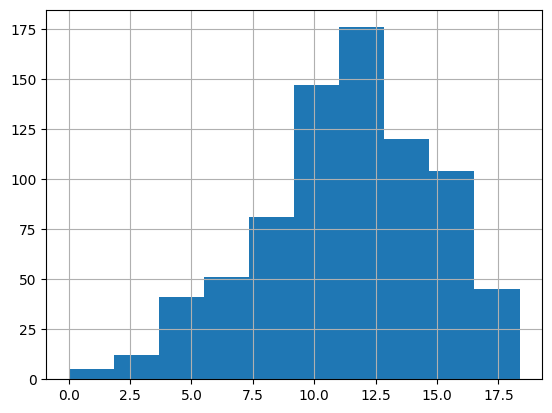

In [59]:
df_new['Age'].hist()

<Axes: >

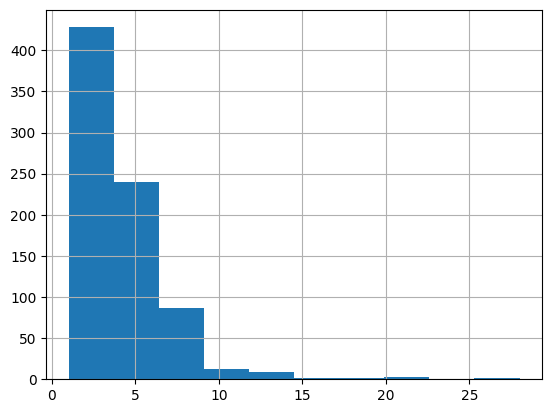

In [60]:
df_new['Length_of_Stay'].hist()

<Axes: >

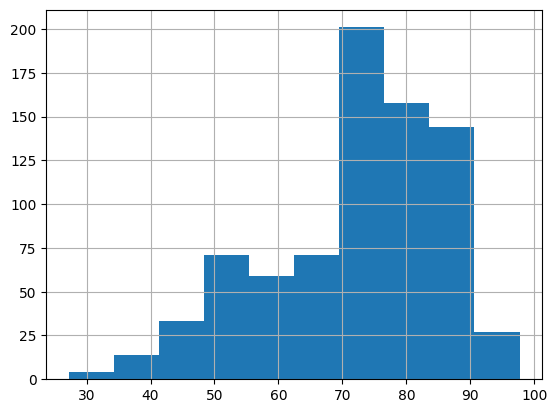

In [61]:
df_new['Neutrophil_Percentage'].hist()

In [62]:
from sklearn.linear_model import ElasticNetCV, RidgeCV, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('Diagnosis', axis=1), df_new['Diagnosis'], test_size=0.2, random_state=42)

In [163]:
model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion='entropy'
)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [164]:
preds = model.predict(X_test)

In [165]:
f1_score(y_test, preds)

0.8333333333333333

In [109]:
accuracy_score(y_test, preds)

0.8853503184713376

 Я тут подумал что если непрерывные значения провести через StandardScaler будет ли значительные изменения.Но на первой модели нет особо каких то различии на f1_score.

In [78]:
df_new2 = df_new.copy()

In [79]:
df_new2[float_columns] = StandardScaler().fit_transform(df_new2[float_columns])

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_new2.drop('Diagnosis', axis=1), df_new2['Diagnosis'], test_size=0.2, random_state=42)

In [93]:
model_copy = DecisionTreeClassifier(
    max_depth=4,
    random_state=42,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion='entropy'
)
model_copy.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

In [94]:
preds_copy = model_copy.predict(X_test2)

In [96]:
f1_score(y_test2, preds_copy)

0.8333333333333333

In [110]:
accuracy_score(y_test2, preds_copy)

0.8853503184713376

Для таго чтобы НН работал с табличными данными я хотел использовать Datret модель но как то не полчалось. И поэтому я взял эту схему.

In [98]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [158]:
X = df_new.drop('Diagnosis', axis=1)
y = df_new['Diagnosis']

In [159]:
class NNDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


train_dataset = NNDataset(X_train, y_train)
test_dataset = NNDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [160]:
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

input_dim = X_train.shape[1]
hidden_dim = 64
output_dim = len(np.unique(y))

model3 = SimpleNN(input_dim, hidden_dim, output_dim)

In [161]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}')

Epoch 1/20, Loss: 0.5503
Epoch 2/20, Loss: 0.4590
Epoch 3/20, Loss: 0.4190
Epoch 4/20, Loss: 0.4333
Epoch 5/20, Loss: 0.4149
Epoch 6/20, Loss: 0.4036
Epoch 7/20, Loss: 0.4155
Epoch 8/20, Loss: 0.4168
Epoch 9/20, Loss: 0.3856
Epoch 10/20, Loss: 0.3871
Epoch 11/20, Loss: 0.3758
Epoch 12/20, Loss: 0.3804
Epoch 13/20, Loss: 0.3734
Epoch 14/20, Loss: 0.3647
Epoch 15/20, Loss: 0.3624
Epoch 16/20, Loss: 0.3589
Epoch 17/20, Loss: 0.3783
Epoch 18/20, Loss: 0.3757
Epoch 19/20, Loss: 0.3413
Epoch 20/20, Loss: 0.3316


In [162]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8089


In [139]:
pip install datret

In [146]:
from datret.datret import DatRetClassifier, DatRetRegressor, DatRetMultilabelClassifier
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [142]:
X_traind, X_testd, y_traind, y_testd = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
y_traind = to_categorical(y_traind)
y_testd = to_categorical(y_testd)
X_traind = to_categorical(X_traind)
X_testd = to_categorical(X_testd)

In [149]:
y_traind_int = np.argmax(y_traind, axis=1)

In [152]:
DR = DatRetClassifier() # DatRetRegressor works on the same principle
DR.fit(X_traind, y_traind)
# predict the actual label (or class) over a new set of data.
DR_predict = DR.predict(X_testd)
# predict the class probabilities for each data point.
DR_predict_proba = DR.predict_proba(X_testd) # Missing in DatRetRegressor, DatRetMultilabelClassifier

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [153]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [154]:
preds2 = model2.predict(X_test)

In [155]:
f1_score(y_test, preds2)

0.8160000000000001

<Axes: >

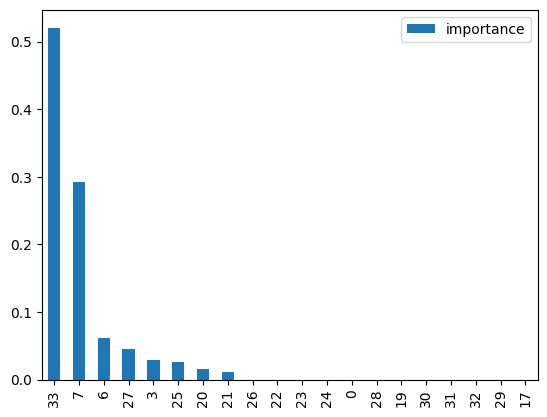

In [167]:
importances = model.feature_importances_
vals = X.columns
forest_vals = pd.DataFrame({'value':vals, 'importance':importances}).sort_values(by='importance', ascending=False)
forest_vals[:20].plot(kind='bar')

<Axes: >

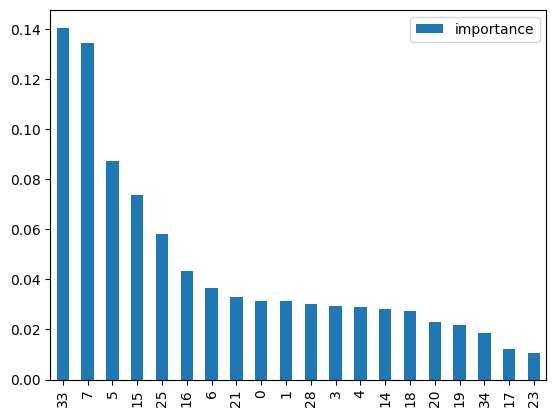

In [169]:
importances = model2.feature_importances_
vals = X.columns
forest_vals = pd.DataFrame({'value':vals, 'importance':importances}).sort_values(by='importance', ascending=False)
forest_vals[:20].plot(kind='bar')

# Заключение
Тут однозначно модель DecisionTreeClassifier показал очень хорошие результаты F1=0.83333,хотя видно что только признаки 31-21 имеют значительный вклад в предсказании модели. А в модели  RandomForestClassifier практически все признаки имеют вклад в предсказании модели.
И еще я никогда не использовал НН для табличных данных,и я думаю что оно в целом не заточено на эти данные.